In [1]:
import distmesh as dm
from camminapy import * 


Bad key "text.kerning_factor" on line 4 in
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


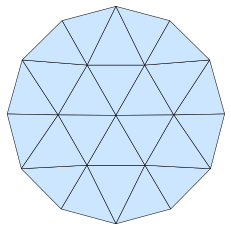

In [2]:
fd = lambda p: np.sqrt(p[:,0]**2+p[:,1]**2)-1.0
P, T = dm.distmesh2d(fd, dm.huniform, 0.4, (-1,-1,1,1))

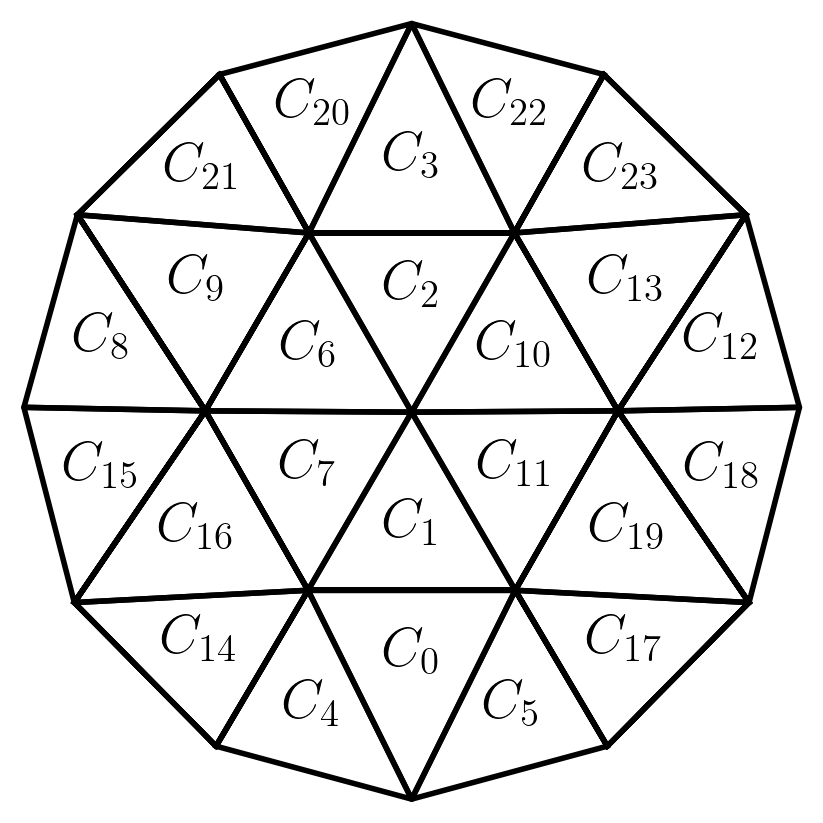

In [3]:
plt.style.use("kitish")
fig, ax = plt.subplots(1,1,figsize=(4,4))
for i,t in enumerate(T):
    x1,y1 = P[t[0]]
    x2,y2 = P[t[1]]
    x3,y3 = P[t[2]]
    
    ax.plot([x1,x2,x3,x1,x2],[y1,y2,y3,y1,y2],'k',lw=2)
    
    xcenter = (x1+x2+x3)/3
    ycenter = (y1+y2+y3)/3
    ax.text(xcenter,ycenter,"$C_{"+"{}".format(i)+"}$",horizontalalignment="center",
           verticalalignment="center",fontsize=20)
    #ax.scatter(xcenter,ycenter,c=kit.blue)
    
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-1.01,1.01])
ax.set_ylim([-1.01,1.01])
#ax.arrow(-1,-1,0.2,0.2,head_width=0.05,
#         color="k")
#ax.text(-0.85,-1,
#        "${\Omega}$")
plt.savefig("sweep1.pdf",dpi = 400)

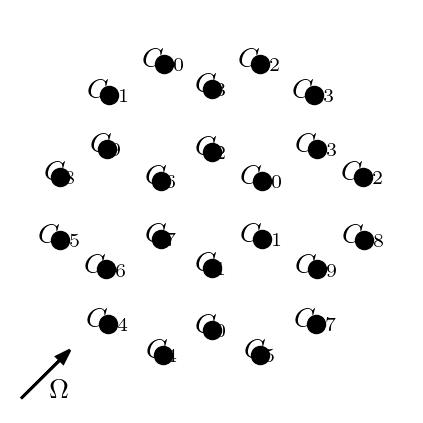

In [4]:
plt.style.use("kitish")
fig, ax = plt.subplots(1,1,figsize=(2,2))
for i,t in enumerate(T):
    x1,y1 = P[t[0]]
    x2,y2 = P[t[1]]
    x3,y3 = P[t[2]]
    
    #ax.plot([x1,x2,x3,x1,x2],[y1,y2,y3,y1,y2],'k',lw=0.2)
    
    xcenter = (x1+x2+x3)/3
    ycenter = (y1+y2+y3)/3
    ax.text(xcenter,ycenter,"$C_{"+"{}".format(i)+"}$",horizontalalignment="center",
           verticalalignment="center")
    ax.scatter(xcenter,ycenter,c="k")
    
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-1.01,1.01])
ax.set_ylim([-1.01,1.01])
ax.arrow(-1,-1,0.2,0.2,head_width=0.05,
         color="k")
ax.text(-0.85,-1,
        "${\Omega}$")
plt.savefig("sweep2.pdf",dpi = 300)

In [5]:
def createdependency(omega,T,P):
    """
    For a mesh of Triangles T where the node positions
    are stored in P and a direction omega,
    this returns a matrix A of size NxN where 
    N is the number of cells in T such that
    A[i,j] = 1 if C_i "comes before" C_j and 0 
    otherwise.
    """
    N,dim = T.shape
    A = np.zeros((N,N),dtype=int)
    
    # This obviously works in O(n) but I can do it in O(n^2)...
    
    for i,ti in enumerate(T):
        for j,tj in enumerate(T):
            if j<i:
                continue
                
            commonnodes = np.intersect1d(ti,tj)
            if len(commonnodes)==2: # checking ==2 instead of >1 takes care of checking with itself
                # I and J are neighbors
                x1,y1 = P[ti[0]]
                x2,y2 = P[ti[1]]
                x3,y3 = P[ti[2]]
                ixcenter = (x1+x2+x3)/3
                iycenter = (y1+y2+y3)/3
                
                x1,y1 = P[tj[0]]
                x2,y2 = P[tj[1]]
                x3,y3 = P[tj[2]]
                jxcenter = (x1+x2+x3)/3
                jycenter = (y1+y2+y3)/3
                
                v = np.array([jxcenter-ixcenter,jycenter-jycenter])
                
                if np.dot(v,omega)<0:
                    A[j,i] = 1
                else:
                    A[i,j] = 1
                
    
    return A

ValueError: Single '}' encountered in format string

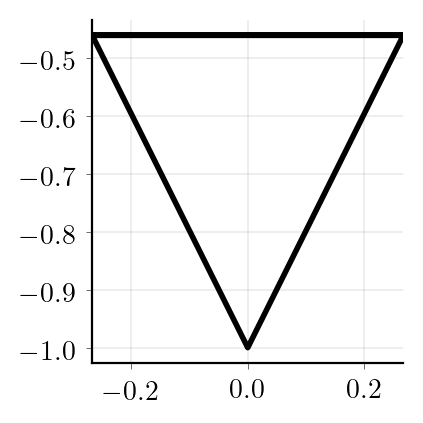

In [6]:
omega = [1,0]
A = createdependency(omega,T,P)
plt.style.use("kitish")
fig, ax = plt.subplots(1,1,figsize=(2,2))
for i,t in enumerate(T):
    x1,y1 = P[t[0]]
    x2,y2 = P[t[1]]
    x3,y3 = P[t[2]]
    
    ax.plot([x1,x2,x3,x1,x2],[y1,y2,y3,y1,y2],'k',lw=2)
    
    xcenter = (x1+x2+x3)/3
    ycenter = (y1+y2+y3)/3
    ax.text(xcenter,ycenter-0.15,"$C_{"+"{}".format(i)+"}$""$C_{}$".format(i),horizontalalignment="center",
           verticalalignment="center")
    ax.scatter(xcenter,ycenter,c="k")
    for j,tj in enumerate(T):
        if A[i,j] == 1:
            x1,y1 = P[tj[0]]
            x2,y2 = P[tj[1]]
            x3,y3 = P[tj[2]]
    
            x2center = (x1+x2+x3)/3
            y2center = (y1+y2+y3)/3
            
            #ax.plot([xcenter,x2center],[ycenter,y2center])
            ax.arrow(xcenter,ycenter,(x2center-xcenter)*0.3,(y2center-ycenter)*0.3,
                    head_width=0.05,color=kit.green,edgecolor=kit.green)
            
    
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-1.01,1.01])
ax.set_ylim([-1.01,1.01])
ax.arrow(-1,-0.95,0.2*omega[0],0.2*omega[1],head_width=0.05,
         color="k")
ax.text(-1,-0.89,
        "${\Omega}$")
plt.savefig("sweep3.pdf",dpi = 300)


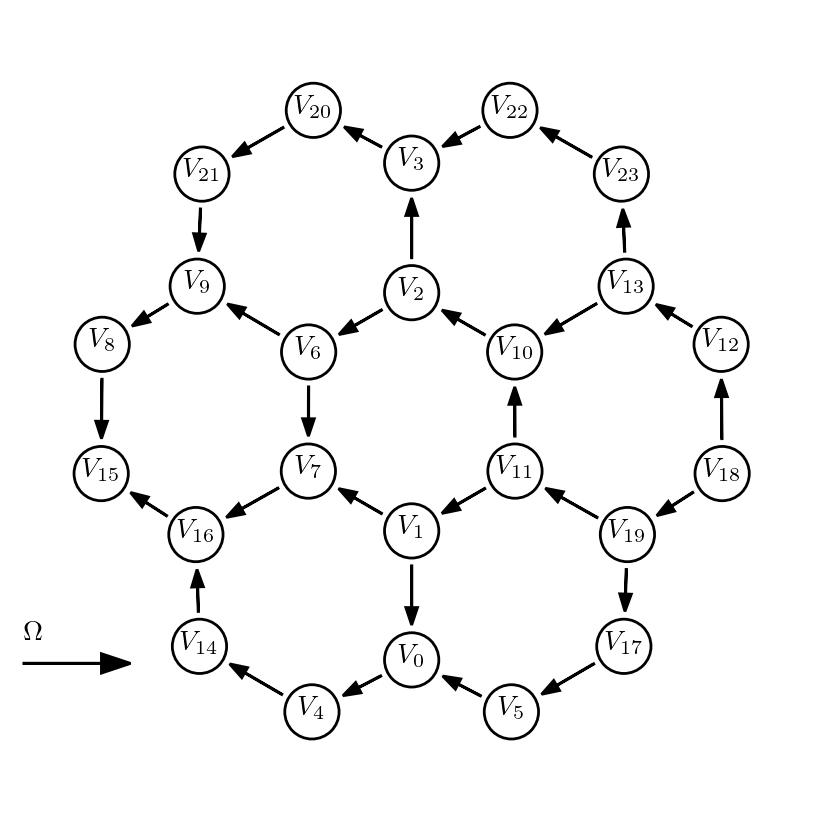

In [7]:
omega = [1,0]
A = createdependency(omega,T,P)
plt.style.use("kitish")
fig, ax = plt.subplots(1,1,figsize=(4,4))
for i,t in enumerate(T):
    x1,y1 = P[t[0]]
    x2,y2 = P[t[1]]
    x3,y3 = P[t[2]]
    
    
    #ax.plot([x1,x2,x3,x1,x2],[y1,y2,y3,y1,y2],'k',lw=2)
    
    xcenter = (x1+x2+x3)/3
    ycenter = (y1+y2+y3)/3
    
    delta = -0.15
    if i in [1,2,8]:
        delta = +0.12
    dx = 0
    if i== 3:
        dx = -0.1
    if i == 7:
        dx = +0.1
        
    delta,dx = 0,0
    ax.text(xcenter+dx,ycenter+delta,"$V_{"+"{}".format(i)+"}$",horizontalalignment="center",
           verticalalignment="center")
#    ax.scatter(xcenter,ycenter,c=kit.blue,zorder = -10)
    Rad = 0.07
    circle1 = plt.Circle((xcenter, ycenter), Rad, color="k",fill=False,zorder=-3)
    ax.add_artist(circle1)
    for j,tj in enumerate(T):
        if A[i,j] == 1:
            x1,y1 = P[tj[0]]
            x2,y2 = P[tj[1]]
            x3,y3 = P[tj[2]]
    
            x2center = (x1+x2+x3)/3
            y2center = (y1+y2+y3)/3
            
            #ax.plot([xcenter,x2center],[ycenter,y2center])
            dx,dy = (x2center-xcenter),(y2center-ycenter)
            L = (dx**2+dy**2)**0.5
            Rad = 0.09
            
            frac = (L-2*Rad)/L
            ax.arrow(xcenter+Rad/L*dx+dx*frac,ycenter+Rad/L*dy+dy*frac,-dx*frac,-dy*frac,
                    head_width=0.03,color='k',
                    length_includes_head=True,zorder=-10)
            
    
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-1.01,1.01])
ax.set_ylim([-1.01,1.01])
ax.arrow(-1,0.3+-0.95,0.2*omega[0],0.2*omega[1],head_width=0.05,
         color="k")
ax.text(-1,0.3+-0.89,
        "${\Omega}$")
plt.savefig("sweep4.pdf",dpi = 1000)


In [28]:
A

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0

In [8]:
class Graph:
    def __init__(self,A):
        self.nodes=A #[[0,0,0,0,0,0],
                    #[1,0,0,1,0,0],
                    #[0,1,0,1,0,0],
                    #[0,0,0,0,0,0],
                    #[0,0,0,1,0,0]
                    #];
        self.count=range(len(self.nodes))

    def GetInputNodesArray(self):
        array = []
        for i in self.count: 
            step=0
            for j in self.count:
                if self.nodes[i][j]==1:step+=1
            array.insert(i,step)
        return array;

    def TopologicSort(self):
        levels =[];
        workArray = self.GetInputNodesArray();
        completedCounter = 0;
        currentLevel = 0;
        while (completedCounter != len(self.nodes)):
            for i in self.count:
                if (workArray[i] == 0):
                    ind=0
                    #добавляем обработанную вершину
                    levels.insert(completedCounter,i);
                    for node in self.nodes:
                        if node[i]==1:
                            workArray[ind]-=1
                        ind+=1

                    workArray[i] = -1; # Помечаем вершину как обработанную
                    completedCounter+=1;
            currentLevel+=1;
        levels.reverse()
        return levels

In [9]:
G = Graph(A)

In [10]:
order = G.TopologicSort()

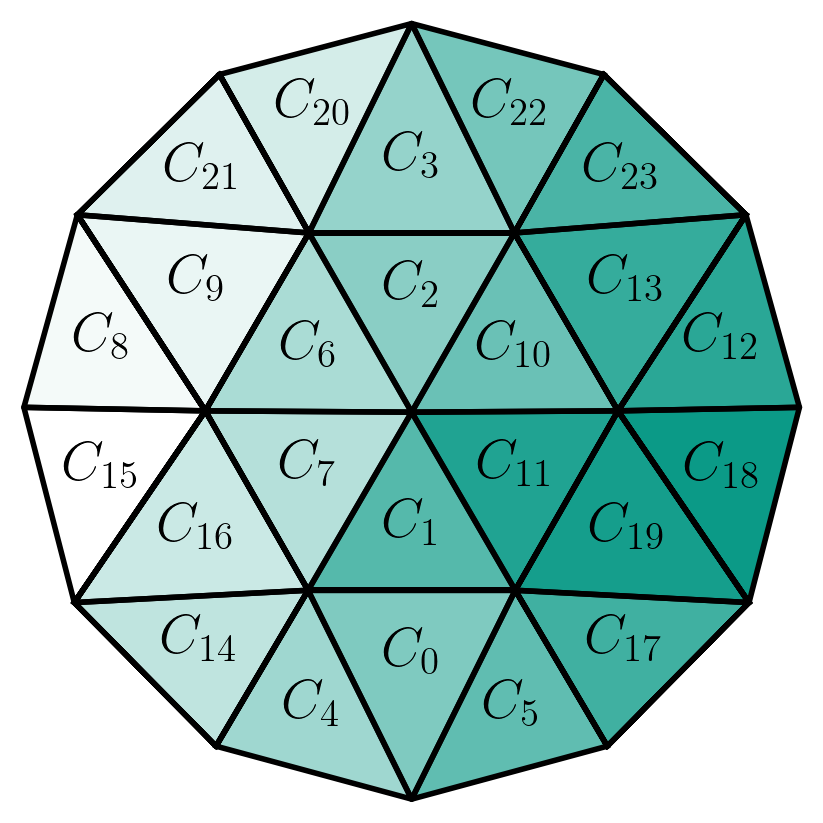

In [11]:
plt.style.use("kitish")
fig, ax = plt.subplots(1,1,figsize=(4,4))
cmap = matplotlib.cm.get_cmap('Blues')
k = kit.green
for i,t in enumerate(T):
    x1,y1 = P[t[0]]
    x2,y2 = P[t[1]]
    x3,y3 = P[t[2]]
    
    ax.plot([x1,x2,x3,x1,x2],[y1,y2,y3,y1,y2],'k',lw=2)
    val = np.where(np.array(order)==i)[0][0]
    col =(k[0],k[1],k[2],val/len(T))
    ax.fill([x1,x2,x3,x1,x2],[y1,y2,y3,y1,y2],color = col)# cmap(val/len(T)))
    
    xcenter = (x1+x2+x3)/3
    ycenter = (y1+y2+y3)/3
    if val > 11:
      c = "w"
    else:
      c = "k"
    c = "k"
    ax.text(xcenter,ycenter,"$C_{"+"{}".format(i)+"}$",horizontalalignment="center",
           verticalalignment="center",color = c,fontsize = 20)
    #ax.scatter(xcenter,ycenter,c=kit.blue)
    
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-1.01,1.01])
ax.set_ylim([-1.01,1.01])
#ax.arrow(-1,-1,0.2,0.2,head_width=0.05,
#         color="k")
#ax.text(-0.85,-1,
#        "${\Omega}$")
plt.savefig("sweep5.pdf",dpi = 400)

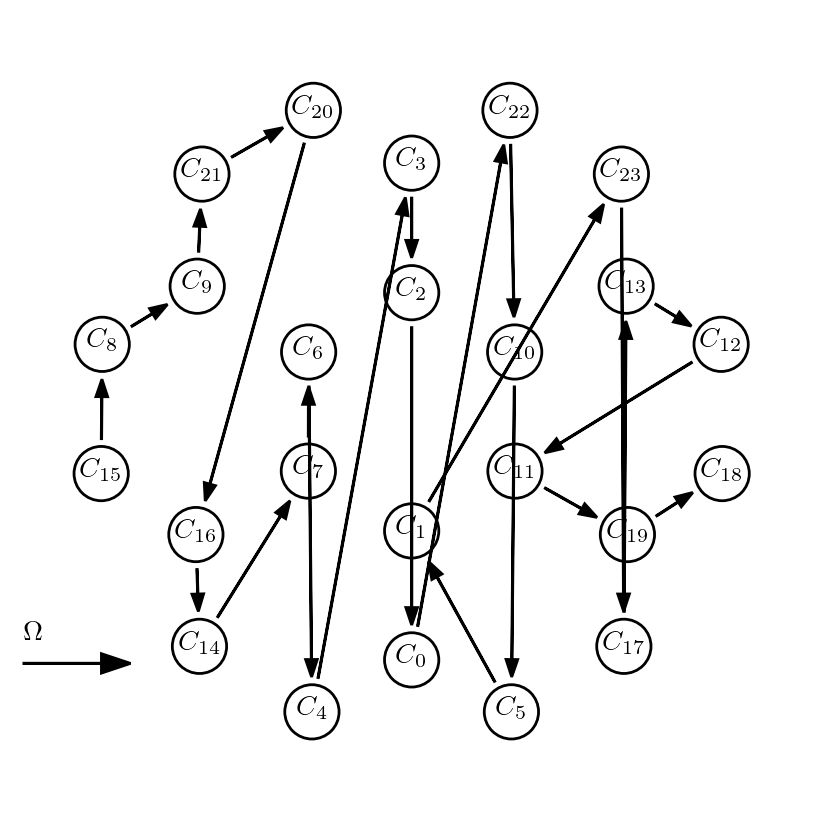

In [88]:
omega = [1,0]
A = createdependency(omega,T,P)
plt.style.use("kitish")
fig, ax = plt.subplots(1,1,figsize=(4,4))
for i,t in enumerate(T):
    
    x1,y1 = P[t[0]]
    x2,y2 = P[t[1]]
    x3,y3 = P[t[2]]
    
    
    #ax.plot([x1,x2,x3,x1,x2],[y1,y2,y3,y1,y2],'k',lw=2)
    
    xcenter = (x1+x2+x3)/3
    ycenter = (y1+y2+y3)/3
    
    delta = -0.15
    if i in [1,2,8]:
        delta = +0.12
    dx = 0
    if i== 3:
        dx = -0.1
    if i == 7:
        dx = +0.1
        
    delta,dx = 0,0
    ax.text(xcenter+dx,ycenter+delta,"$C_{"+"{}".format(i)+"}$",horizontalalignment="center",
           verticalalignment="center")
#    ax.scatter(xcenter,ycenter,c=kit.blue,zorder = -10)
    Rad = 0.07
    circle1 = plt.Circle((xcenter, ycenter), Rad, color="k",fill=False,zorder=-3)
    ax.add_artist(circle1)
for pos,val in enumerate(order):
  if pos == len(order)-1:
    continue
  t = T[val]
  x1,y1 = P[t[0]]
  x2,y2 = P[t[1]]
  x3,y3 = P[t[2]]
  xcenter = (x1+x2+x3)/3
  ycenter = (y1+y2+y3)/3
  
  t = T[order[pos+1]]
  x1,y1 = P[t[0]]
  x2,y2 = P[t[1]]
  x3,y3 = P[t[2]]
  x2center = (x1+x2+x3)/3
  y2center = (y1+y2+y3)/3
  dx = x2center-xcenter
  dy = y2center-ycenter
  Rad = 0.09
  L = (dx**2+dy**2)**0.5
  frac = (L-2*Rad)/L
  col =(k[0],k[1],k[2],(pos+10)/(10+len(T)))
  a,b,c,d = np.random.randn(4)*0.0
  ax.arrow(a+xcenter+Rad/L*dx,b+ycenter+Rad/L*dy,c+dx*frac,d+dy*frac,
                    head_width=0.03,color="k",
                    length_includes_head=True,zorder=-10)
            
 
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-1.01,1.01])
ax.set_ylim([-1.01,1.01])
ax.arrow(-1,0.3+-0.95,0.2*omega[0],0.2*omega[1],head_width=0.05,
         color="k")
ax.text(-1,0.3+-0.89,
        "${\Omega}$")
plt.savefig("tmp.png",dpi = 1000)


/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


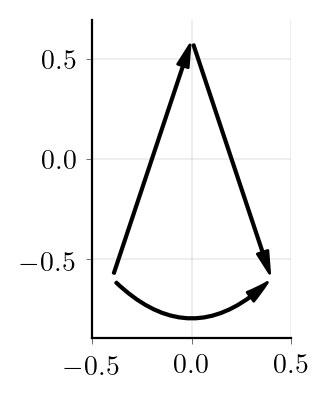

In [89]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.axes().set_xlim(-.5,0.5)
plt.axes().set_ylim(-0.9,0.7)
plt.axes().set_aspect(1)

style="Simple,tail_width=0.5,head_width=4,head_length=8"
kw = dict(arrowstyle=style, color="k")

a1 = patches.FancyArrowPatch((-0.4,-0.6), (0,0.6),**kw )
a2 = patches.FancyArrowPatch((0,0.6), (0.4,-0.6),**kw)
a3 = patches.FancyArrowPatch((-0.4,-0.6), (0.4,-0.6),connectionstyle="arc3,rad=.5", **kw)

for a in [a1,a2,a3]:
    plt.gca().add_patch(a)
plt.show()

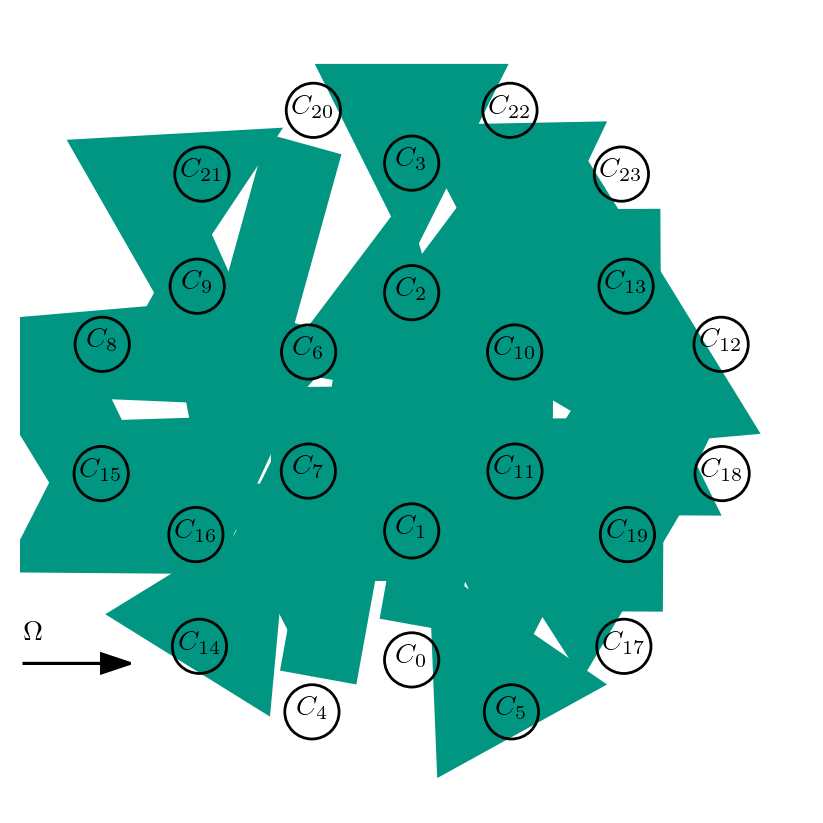

In [116]:
omega = [1,0]
from matplotlib.collections import PatchCollection 
A = createdependency(omega,T,P)
plt.style.use("kitish")
fig, ax = plt.subplots(1,1,figsize=(4,4))
for i,t in enumerate(T):
    
    x1,y1 = P[t[0]]
    x2,y2 = P[t[1]]
    x3,y3 = P[t[2]]
    
    
    #ax.plot([x1,x2,x3,x1,x2],[y1,y2,y3,y1,y2],'k',lw=2)
    
    xcenter = (x1+x2+x3)/3
    ycenter = (y1+y2+y3)/3
    
    delta = -0.15
    if i in [1,2,8]:
        delta = +0.12
    dx = 0
    if i== 3:
        dx = -0.1
    if i == 7:
        dx = +0.1
        
    delta,dx = 0,0
    ax.text(xcenter+dx,ycenter+delta,"$C_{"+"{}".format(i)+"}$",horizontalalignment="center",
           verticalalignment="center")
#    ax.scatter(xcenter,ycenter,c=kit.blue,zorder = -10)
    Rad = 0.07
    circle1 = plt.Circle((xcenter, ycenter), Rad, color="k",fill=False,zorder=2)
    ax.add_artist(circle1)
for pos,val in enumerate(order):
  if pos == len(order)-1:
    continue
  t = T[val]
  x1,y1 = P[t[0]]
  x2,y2 = P[t[1]]
  x3,y3 = P[t[2]]
  xcenter = (x1+x2+x3)/3
  ycenter = (y1+y2+y3)/3
  
  t = T[order[pos+1]]
  x1,y1 = P[t[0]]
  x2,y2 = P[t[1]]
  x3,y3 = P[t[2]]
  x2center = (x1+x2+x3)/3
  y2center = (y1+y2+y3)/3
  dx = x2center-xcenter
  dy = y2center-ycenter
  Rad = 0.09
  L = (dx**2+dy**2)**0.5
  frac = (L-2*Rad)/L
  col =(k[0],k[1],k[2],(pos+10)/(10+len(T)))
  a,b,c,d = np.random.randn(4)*0
 # ax.arrow(a+xcenter+Rad/L*dx,b+ycenter+Rad/L*dy,c+dx*frac,d+dy*frac,
  #                  head_width=0.03,color="k",
   #                 length_includes_head=True,zorder=-100)
  a3 = patches.FancyArrowPatch((xcenter+Rad/L*dx,ycenter+Rad/L*dy), (x2center-Rad/L*dx,y2center-Rad/L*dy), arrowstyle="simple")#,connectionstyle="arc3,rad=-.3",
                             #)
  asd = PatchCollection([a3],zorder = -10)
  ax.add_collection(asd)
  
#  plt.gca().add_patch(a3,zorder = 1)
  
#  for a in [a3]:
#   
 
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-1.01,1.01])
ax.set_ylim([-1.01,1.01])
ax.arrow(-1,0.3+-0.95,0.2*omega[0],0.2*omega[1],head_width=0.05,
         color="k")
ax.text(-1,0.3+-0.89,
        "${\Omega}$")
plt.savefig("tmp.png",dpi = 1000)
